In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.rcParams.update({'font.size': 15})

In [3]:
def read_data(filename='all'):
    path = 'C:/Users/aganb/Desktop/Thesis/code/v1.0/logs/data_collection'
    if filename == 'all':
        all_files = glob.glob(path + "/*.csv")
        df_from_each_file = (pd.read_csv(f) for f in all_files)
        data = pd.concat(df_from_each_file, ignore_index=True)
    else:
        data = pd.read_csv(path + '/' + filename + '.csv')
    data = data[data['Mass'] > 3230]
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
    return data
data = read_data('all')

In [4]:
data.shape

(180999, 28)

In [5]:
data['Drag Z'] = np.abs(data['Drag Z'])

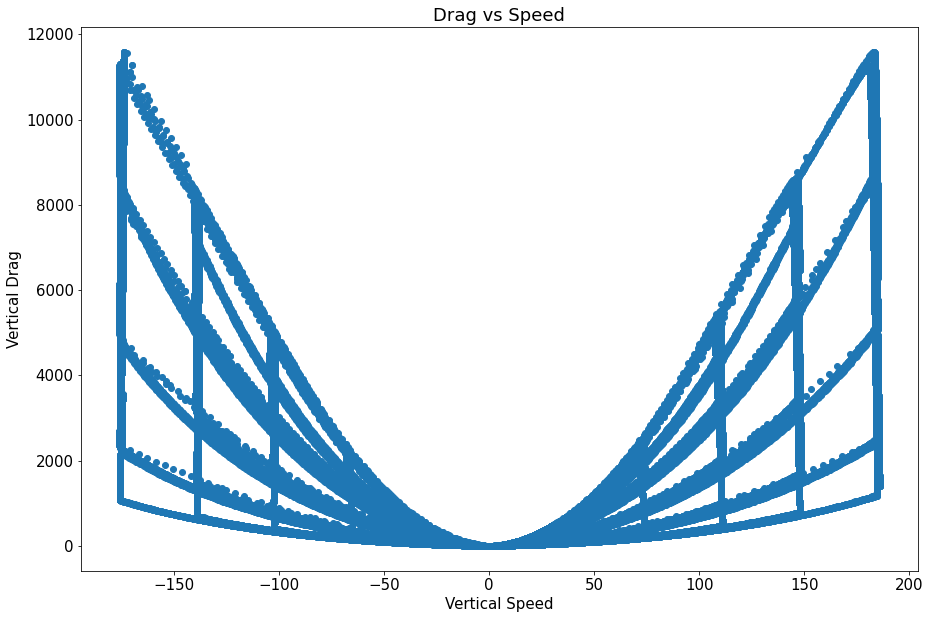

In [6]:
fig = plt.figure(figsize=(15, 10))
plt.xlabel('Vertical Speed')
plt.ylabel('Vertical Drag')
plt.title('Drag vs Speed')
plt.scatter(data['Vertical Velocity'], data['Drag Z'])

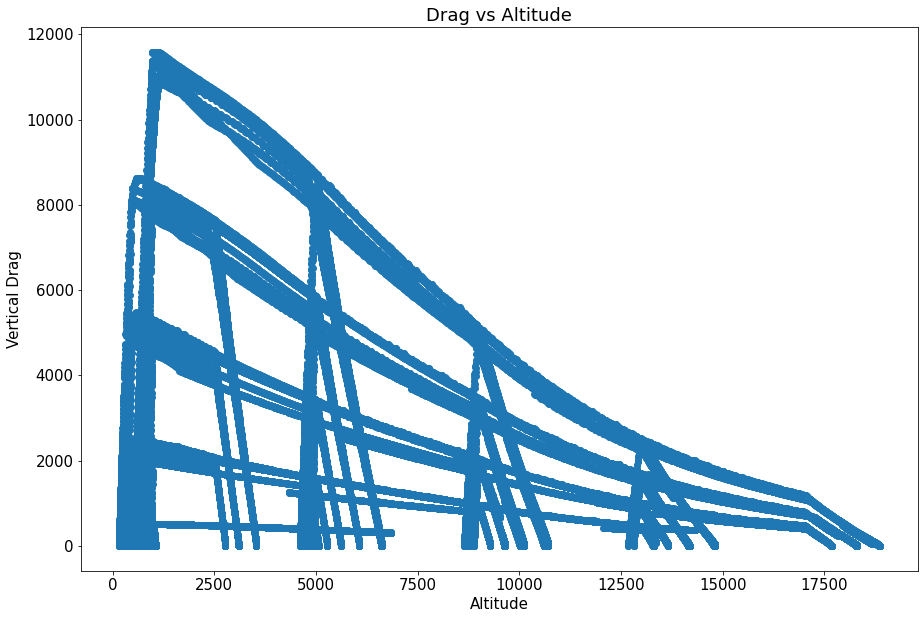

In [5]:
fig = plt.figure(figsize=(15, 10))
plt.xlabel('Altitude')
plt.ylabel('Vertical Drag')
plt.title('Drag vs Altitude')
plt.scatter(data['Altitude'], data['Drag Z'])

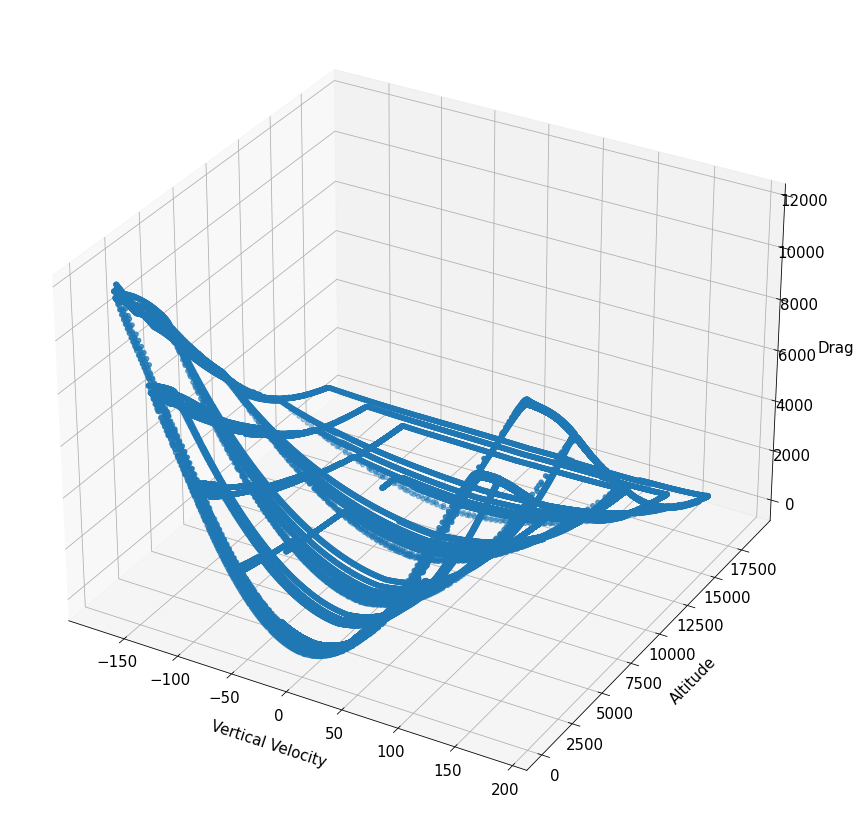

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Vertical Velocity', labelpad=15)
ax.set_ylabel('Altitude', labelpad=15)
ax.set_zlabel('Drag', labelpad=15)
ax.scatter(data['Vertical Velocity'], data['Altitude'], data['Drag Z'])
plt.savefig('drag3d.png')

In [7]:
from sklearn import linear_model, tree
from sklearn.model_selection import train_test_split

In [8]:
X = data[['Vertical Velocity', 'Altitude']]
y = data['Drag Z']

In [ ]:
clf = linear_model.LinearRegression()
clf.fit(X, y)
print("Linear regression r2 score overfit")
print(r2_score(y, clf.predict(X)))

In [ ]:
clf = tree.DecisionTreeRegressor()
clf.fit(X, y)
print("Decision tree regressor r2 score all")
print(r2_score(y, clf.predict(X)))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
print("Decision tree regressor r2 score")
print(r2_score(y_test, clf.predict(X_test)))

Decision tree regressor r2 score
0.9999262082499605


In [33]:
# Poly regression
X = X_train['Vertical Velocity']
Y = X_train['Altitude']
A = np.array([X*0+1, X, Y, X**2, X**2*Y, X**2*Y**2, Y**2, X*Y**2, X*Y]).T
B = y_train.values.flatten()
coeff, r, rank, s = np.linalg.lstsq(A, B)

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [36]:
def poly2Dc(X, Y, c):
    return (c[0] + 
            X*c[1] + 
            Y*c[2] + 
            X**2*c[3] + 
            X**2*Y*c[4] + 
            X**2*Y**2*c[5] + 
            Y**2*c[6] + 
            X*Y**2*c[7] + 
            X*Y*c[8])

def poly2D(X, Y):
    return (1.434s04918e+02 + 
            X*-1.07837652e-01 + 
            Y*1.58209854e-02 + 
            X**2*4.32141454e-01 + 
            X**2*Y*-4.05546606e-05 + 
            X**2*Y**2*1.00025150e-09 + 
            Y**2*-1.36906589e-06 + 
            X*Y**2*-1.82363448e-09 + 
            X*Y*2.98008973e-05)

y_predc = poly2Dc(X_test['Vertical Velocity'], X_test['Altitude'], coeff)
y_pred = poly2D(X_test['Vertical Velocity'], X_test['Altitude'])

In [38]:
print("Poly regression r2 score")
print(r2_score(y_test, y_pred))

Poly regression r2 score
0.9953076191193649


In [ ]:
# save tree
import pickle
pickle.dump(clf, open('drag_tree.sav', 'wb'))

In [ ]:
# test tree
clf = pickle.load(open('drag_tree.sav', 'rb'))
clf.predict([[-300, 10000]])

## 1D (drag vs speed) old

0.6134636322601426


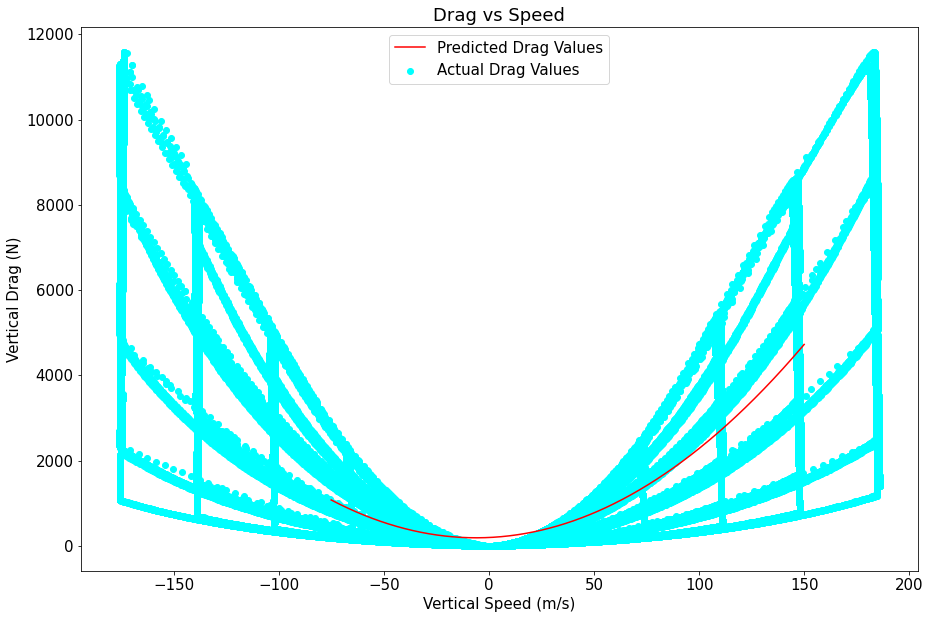

In [7]:
poly = np.poly1d(np.polyfit(data['Vertical Velocity'], data['Drag Z'], 2))
print(r2_score(data['Drag Z'], poly(data['Vertical Velocity'])))
predicted = poly(np.linspace(-75, 150, 1000))
fig = plt.figure(figsize=(15, 10))
plt.xlabel('Vertical Speed (m/s)')
plt.ylabel('Vertical Drag (N)')
plt.title('Drag vs Speed')
plt.scatter(data['Vertical Velocity'], data['Drag Z'], c='cyan', label='Actual Drag Values')
plt.plot(np.linspace(-75, 150, 1000), predicted, c='red', label='Predicted Drag Values')
plt.legend(loc='best')
plt.show()

In [ ]:
# np.save('drag', poly)